In [73]:
import pandas as pd
import os
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from matplotlib import pyplot as plt
%matplotlib inline

In [33]:
get_full_path = lambda f: os.path.join('..', 'datasets', 'instacart', f)

order_product_file = get_full_path('order_products__prior.csv')
product_file = get_full_path('products.csv')

order_product_df = pd.read_csv(order_product_file, nrows=50000)
product_df = pd.read_csv(product_file)

In [34]:
print(order_product_df.head())
print('='*100)
print(product_df.head())

   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [35]:
order_baskets = pd.merge(order_product_df,product_df, on=['product_id'], how='inner')
order_baskets['product_name'].value_counts().rename("freq").head()
order_baskets.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [36]:
single_basket = order_baskets[order_baskets['order_id'] == 2]
single_basket

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
38,2,28985,2,1,Michigan Organic Kale,83,4
138,2,9327,3,0,Garlic Powder,104,13
144,2,45918,4,1,Coconut Butter,19,13
147,2,30035,5,0,Natural Sweetener,17,13
148,2,17794,6,1,Carrots,83,4
262,2,40141,7,1,Original Unflavored Gelatine Mix,105,13
263,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13
271,2,43668,9,0,Classic Blend Cole Slaw,123,4


In [37]:
shopping_baskets = order_baskets.groupby(['order_id'])['product_name'].apply(list)
shopping_baskets.head()

order_id
2    [Organic Egg Whites, Michigan Organic Kale, Ga...
3    [Total 2% with Strawberry Lowfat Greek Straine...
4    [Plain Pre-Sliced Bagels, Honey/Lemon Cough Dr...
5    [Bag of Organic Bananas, Just Crisp, Parmesan,...
6    [Cleanse, Dryer Sheets Geranium Scent, Clean D...
Name: product_name, dtype: object

###  Transaction encoding

In [38]:
te = TransactionEncoder()
te_ary = te.fit(shopping_baskets).transform(shopping_baskets)
basket_encoded = pd.DataFrame(te_ary, columns=te.columns_)
basket_encoded.head()

,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,0% Fat Organic Greek Vanilla Yogurt,0% Fat Superfruits Greek Yogurt,0% Greek Strained Yogurt,0% Greek Yogurt Black Cherry on the Bottom,"0% Greek, Blueberry on the Bottom Yogurt",0% Milkfat Greek Plain Yogurt,...,gel hand wash sea minerals,in Gravy with Carrots Peas & Corn Mashed Potatoes & Meatloaf Nuggets,of Hanover 100 Calorie Pretzels Mini,of Norwich Original English Mustard Powder Double Superfine,smartwater® Electrolyte Enhanced Water,vitaminwater® XXX Acai Blueberry Pomegranate,with Crispy Almonds Cereal,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Most popular items

In [45]:
freq_items = apriori(basket_encoded, min_support=0.01, use_colnames=True).sort_values(by='support', ascending=False)
print(freq_items.describe())
freq_items.head()

          support
count  123.000000
mean     0.021263
std      0.019332
min      0.010044
25%      0.011852
50%      0.016272
75%      0.021695
max      0.151065


,support,itemsets
6,0.151065,(Banana)
5,0.123945,(Bag of Organic Bananas)
76,0.083568,(Organic Strawberries)
38,0.070108,(Organic Baby Spinach)
57,0.066894,(Organic Hass Avocado)


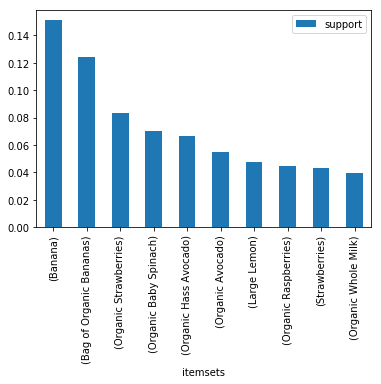

In [40]:
freq_items.set_index('itemsets').head(10).plot.bar()

In [41]:
freq_items['length'] = freq_items['itemsets'].apply(len)
group_support = freq_items[(freq_items['length'] > 1) & (freq_items['support'] > 0.0001)]
group_support.head()

,support,itemsets,length
109,0.021695,"(Bag of Organic Bananas, Organic Hass Avocado)",2
117,0.019285,"(Organic Strawberries, Banana)",2
111,0.017678,"(Organic Strawberries, Bag of Organic Bananas)",2
114,0.016472,"(Banana, Organic Avocado)",2
115,0.015267,"(Banana, Organic Baby Spinach)",2


In [57]:
itemsets = group_support['itemsets']

single_item_support = freq_items[freq_items['itemsets'].apply(len) == 1]
single_item_support = {set(row['itemsets'].copy()).pop(): row['support'] for i, row in single_item_support.iterrows()}
single_item_support

{'Banana': 0.15106468461229408,
 'Bag of Organic Bananas': 0.1239453595821615,
 'Organic Strawberries': 0.08356769787063077,
 'Organic Baby Spinach': 0.07010847730012053,
 'Organic Hass Avocado': 0.06689433507432704,
 'Organic Avocado': 0.05524306950582563,
 'Large Lemon': 0.047810365608678185,
 'Organic Raspberries': 0.04479710727199679,
 'Strawberries': 0.043591803937324224,
 'Organic Whole Milk': 0.03937324226597027,
 'Limes': 0.03716351948573724,
 'Organic Garlic': 0.03595821615106468,
 'Organic Yellow Onion': 0.035757332261952594,
 'Organic Zucchini': 0.030534351145038167,
 'Organic Fuji Apple': 0.02932904781036561,
 'Organic Blueberries': 0.02892728003214142,
 'Honeycrisp Apple': 0.02872639614302933,
 'Cucumber Kirby': 0.027721976697468863,
 'Organic Lemon': 0.027320208919244676,
 'Organic Half & Half': 0.02691844114102049,
 'Organic Grape Tomatoes': 0.026516673362796304,
 'Apple Honeycrisp Organic': 0.026114905584572117,
 'Organic Cucumber': 0.025311370028123746,
 'Organic Baby 

In [43]:
for iset in itemsets:
    print(iset)
    for item in iset:
        print(item)

frozenset({'Bag of Organic Bananas', 'Organic Hass Avocado'})
Bag of Organic Bananas
Organic Hass Avocado
frozenset({'Organic Strawberries', 'Banana'})
Organic Strawberries
Banana
frozenset({'Organic Strawberries', 'Bag of Organic Bananas'})
Organic Strawberries
Bag of Organic Bananas
frozenset({'Banana', 'Organic Avocado'})
Banana
Organic Avocado
frozenset({'Banana', 'Organic Baby Spinach'})
Banana
Organic Baby Spinach
frozenset({'Organic Raspberries', 'Bag of Organic Bananas'})
Organic Raspberries
Bag of Organic Bananas
frozenset({'Banana', 'Strawberries'})
Banana
Strawberries
frozenset({'Organic Baby Spinach', 'Bag of Organic Bananas'})
Organic Baby Spinach
Bag of Organic Bananas
frozenset({'Organic Strawberries', 'Organic Hass Avocado'})
Organic Strawberries
Organic Hass Avocado
frozenset({'Honeycrisp Apple', 'Banana'})
Honeycrisp Apple
Banana
frozenset({'Organic Strawberries', 'Organic Baby Spinach'})
Organic Strawberries
Organic Baby Spinach
frozenset({'Organic Fuji Apple', 'Bana

In [84]:
basket_encoded

basket_list = []
# Create dataframe which contains
# src_obj, sink_obj, support_src, support_sink, support_combi
for ki, vi in single_item_support.items():
    for ko, vo in single_item_support.items():
        if ki != ko:
            combi = len(basket_encoded[basket_encoded[ki] & basket_encoded[ko]]) / len(basket_encoded)
            entry = {'src_obj': ki,
                     'sink_obj': ko,
                     'support_src': vi,
                     'support_sink': vo,
                     'support_combi': combi,
                     'lift': combi / (vi * vo),
                     'confidence': combi / vi,
                     'leverage': combi - vi * vo
                    }
            basket_list.append(entry)
            

In [88]:
support_df = pd.DataFrame(basket_list)[['src_obj', 'sink_obj', 'support_src', 'support_sink', 'support_combi', 'lift', 'confidence', 'leverage']]
print('negative leverage: ', len(support_df[support_df['leverage'] < 0]))
print('positive leverage: ', len(support_df[support_df['leverage'] > 0]))
# support_df.sort_values('lift', ascending=False).head(20)
top_confidence_df = support_df.sort_values('confidence', ascending=False).head(200)
top_confidence_df

negative leverage:  3706
positive leverage:  7850


,src_obj,sink_obj,support_src,support_sink,support_combi,lift,confidence,leverage
8988,Unsweetened Original Almond Breeze Almond Milk,Banana,0.011852,0.151065,0.005022,2.804950,0.423729,0.003232
1712,Honeycrisp Apple,Banana,0.028726,0.151065,0.012053,2.777488,0.419580,0.007713
8774,Whipped Cream Cheese,Banana,0.011852,0.151065,0.004620,2.580554,0.389831,0.002830
9951,Fat Free Milk,Banana,0.011249,0.151065,0.004219,2.482380,0.375000,0.002519
1498,Organic Fuji Apple,Banana,0.029329,0.151065,0.010848,2.448375,0.369863,0.006417
1819,Cucumber Kirby,Banana,0.027722,0.151065,0.010044,2.398435,0.362319,0.005856
9631,Organic Navel Orange,Bag of Organic Bananas,0.011651,0.123945,0.004219,2.921198,0.362069,0.002774
9845,Organic Grade A Free Range Large Brown Eggs,Bag of Organic Bananas,0.011249,0.123945,0.004018,2.881454,0.357143,0.002623
7811,Bartlett Pears,Banana,0.012656,0.151065,0.004419,2.311635,0.349206,0.002508
2889,Original Hummus,Banana,0.022700,0.151065,0.007834,2.284669,0.345133,0.004405


Text(0.5,1,'Top 200 confidence')

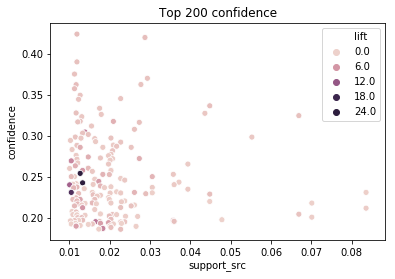

In [83]:
ax = sns.scatterplot(x='support_src', y='confidence', hue='lift', data=top_confidence_df)
ax.set_title('Top 200 confidence')